In [1]:
import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = os.getcwd()
data_files = glob.glob(os.path.join(path, "results/output*"))

li = []
for filename in data_files:
    df = pd.read_csv(filename)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

new_names = dict([(i,'metric_'+ i) for i in df.iloc[0:1,9:].columns.values])
df.rename(columns=new_names, inplace=True)

df = df[df['metric_accuracy'].notna()]
df

,model,main_metric,sample_size,feature_selector,feature_selection_frac,validation_type,train_size,cv_split_size,par_split_size,metric_accuracy,metric_balanced_accuracy,metric_f1,metric_precision,metric_recall
0,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.545455,0.550000,0.545455,0.554545,0.545455
1,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.545455,0.550000,0.545455,0.554545,0.545455
2,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.727273,0.716667,0.722611,0.730519,0.727273
3,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.818182,0.833333,0.815152,0.870130,0.818182
4,logistic_regression,accuracy,0.03,rfe,0.4,ts,0.6,NaN,2,0.636364,0.633333,0.636364,0.636364,0.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418675,logistic_regression,recall,1.00,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.809704,0.806119,0.809077,0.811178,0.809704
418676,logistic_regression,recall,1.00,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.814146,0.811485,0.813549,0.816838,0.814146
418677,logistic_regression,recall,1.00,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.811902,0.809597,0.811391,0.814973,0.811902
418678,logistic_regression,recall,1.00,rfe,1.0,fs_kfold_pt_nested,NaN,13.0,13,0.810850,0.808155,0.810440,0.812399,0.810850


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418500 entries, 0 to 418679
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   model                     418500 non-null  object 
 1   main_metric               418500 non-null  object 
 2   sample_size               418500 non-null  float64
 3   feature_selector          418500 non-null  object 
 4   feature_selection_frac    418500 non-null  float64
 5   validation_type           418500 non-null  object 
 6   train_size                66000 non-null   float64
 7   cv_split_size             330000 non-null  float64
 8   par_split_size            418500 non-null  int64  
 9   metric_accuracy           418500 non-null  float64
 10  metric_balanced_accuracy  418500 non-null  float64
 11  metric_f1                 418500 non-null  float64
 12  metric_precision          418500 non-null  float64
 13  metric_recall             418500 non-null  f

In [4]:
metrics = ['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall']
performances = ['mean_performance', 'median_performance', 'max_performance', 'min_performance', 'lower_bound_confidence_interval', 'upper_bound_confidence_interval', 'performance_variance']

In [5]:
selection = df[(df['feature_selection_frac'] == 1.0)
    & (df['main_metric'] == 'accuracy')
    & ((df['train_size'] == 0.9) | df['train_size'].isna())
    & ((df['cv_split_size'] == 13.0) | df['cv_split_size'].isna())]

In [6]:
selection = selection.reset_index()

In [14]:
pivoted = pd.wide_to_long(selection, stubnames='metric', i='index', j='metric_type', sep='_', suffix=r'\w+')
pivoted.reset_index(inplace=True)
pivoted = pivoted.drop('index', axis=1)
pivoted.rename(columns={'metric': 'metric_measurement'}, inplace=True)
pivoted

,metric_type,sample_size,par_split_size,train_size,cv_split_size,feature_selection_frac,feature_selector,validation_type,model,main_metric,metric_measurement
0,accuracy,0.03,2,0.9,NaN,1.0,rfe,ts,logistic_regression,accuracy,1.000000
1,accuracy,0.03,2,0.9,NaN,1.0,rfe,ts,logistic_regression,accuracy,0.333333
2,accuracy,0.03,2,0.9,NaN,1.0,rfe,ts,logistic_regression,accuracy,0.000000
3,accuracy,0.03,2,0.9,NaN,1.0,rfe,ts,logistic_regression,accuracy,0.666667
4,accuracy,0.03,2,0.9,NaN,1.0,rfe,ts,logistic_regression,accuracy,0.666667
...,...,...,...,...,...,...,...,...,...,...,...
37495,recall,1.00,13,NaN,13.0,1.0,rfe,fs_kfold_pt_nested,logistic_regression,accuracy,0.809828
37496,recall,1.00,13,NaN,13.0,1.0,rfe,fs_kfold_pt_nested,logistic_regression,accuracy,0.813140
37497,recall,1.00,13,NaN,13.0,1.0,rfe,fs_kfold_pt_nested,logistic_regression,accuracy,0.813063
37498,recall,1.00,13,NaN,13.0,1.0,rfe,fs_kfold_pt_nested,logistic_regression,accuracy,0.810989


In [15]:
r = pivoted['sample_size'] * 918
pivoted['sample_size'] = r
pivoted

,metric_type,sample_size,par_split_size,train_size,cv_split_size,feature_selection_frac,feature_selector,validation_type,model,main_metric,metric_measurement
0,accuracy,27.54,2,0.9,NaN,1.0,rfe,ts,logistic_regression,accuracy,1.000000
1,accuracy,27.54,2,0.9,NaN,1.0,rfe,ts,logistic_regression,accuracy,0.333333
2,accuracy,27.54,2,0.9,NaN,1.0,rfe,ts,logistic_regression,accuracy,0.000000
3,accuracy,27.54,2,0.9,NaN,1.0,rfe,ts,logistic_regression,accuracy,0.666667
4,accuracy,27.54,2,0.9,NaN,1.0,rfe,ts,logistic_regression,accuracy,0.666667
...,...,...,...,...,...,...,...,...,...,...,...
37495,recall,918.00,13,NaN,13.0,1.0,rfe,fs_kfold_pt_nested,logistic_regression,accuracy,0.809828
37496,recall,918.00,13,NaN,13.0,1.0,rfe,fs_kfold_pt_nested,logistic_regression,accuracy,0.813140
37497,recall,918.00,13,NaN,13.0,1.0,rfe,fs_kfold_pt_nested,logistic_regression,accuracy,0.813063
37498,recall,918.00,13,NaN,13.0,1.0,rfe,fs_kfold_pt_nested,logistic_regression,accuracy,0.810989


In [16]:
accuracy_selection = pivoted[pivoted['metric_type'] == 'accuracy']

In [17]:
accuracy_selection_lr = accuracy_selection[accuracy_selection['model'] == 'logistic_regression']
accuracy_selection_lr

,metric_type,sample_size,par_split_size,train_size,cv_split_size,feature_selection_frac,feature_selector,validation_type,model,main_metric,metric_measurement
0,accuracy,27.54,2,0.9,NaN,1.0,rfe,ts,logistic_regression,accuracy,1.000000
1,accuracy,27.54,2,0.9,NaN,1.0,rfe,ts,logistic_regression,accuracy,0.333333
2,accuracy,27.54,2,0.9,NaN,1.0,rfe,ts,logistic_regression,accuracy,0.000000
3,accuracy,27.54,2,0.9,NaN,1.0,rfe,ts,logistic_regression,accuracy,0.666667
4,accuracy,27.54,2,0.9,NaN,1.0,rfe,ts,logistic_regression,accuracy,0.666667
...,...,...,...,...,...,...,...,...,...,...,...
7495,accuracy,918.00,13,NaN,13.0,1.0,rfe,fs_kfold_pt_nested,logistic_regression,accuracy,0.809828
7496,accuracy,918.00,13,NaN,13.0,1.0,rfe,fs_kfold_pt_nested,logistic_regression,accuracy,0.813140
7497,accuracy,918.00,13,NaN,13.0,1.0,rfe,fs_kfold_pt_nested,logistic_regression,accuracy,0.813063
7498,accuracy,918.00,13,NaN,13.0,1.0,rfe,fs_kfold_pt_nested,logistic_regression,accuracy,0.810989


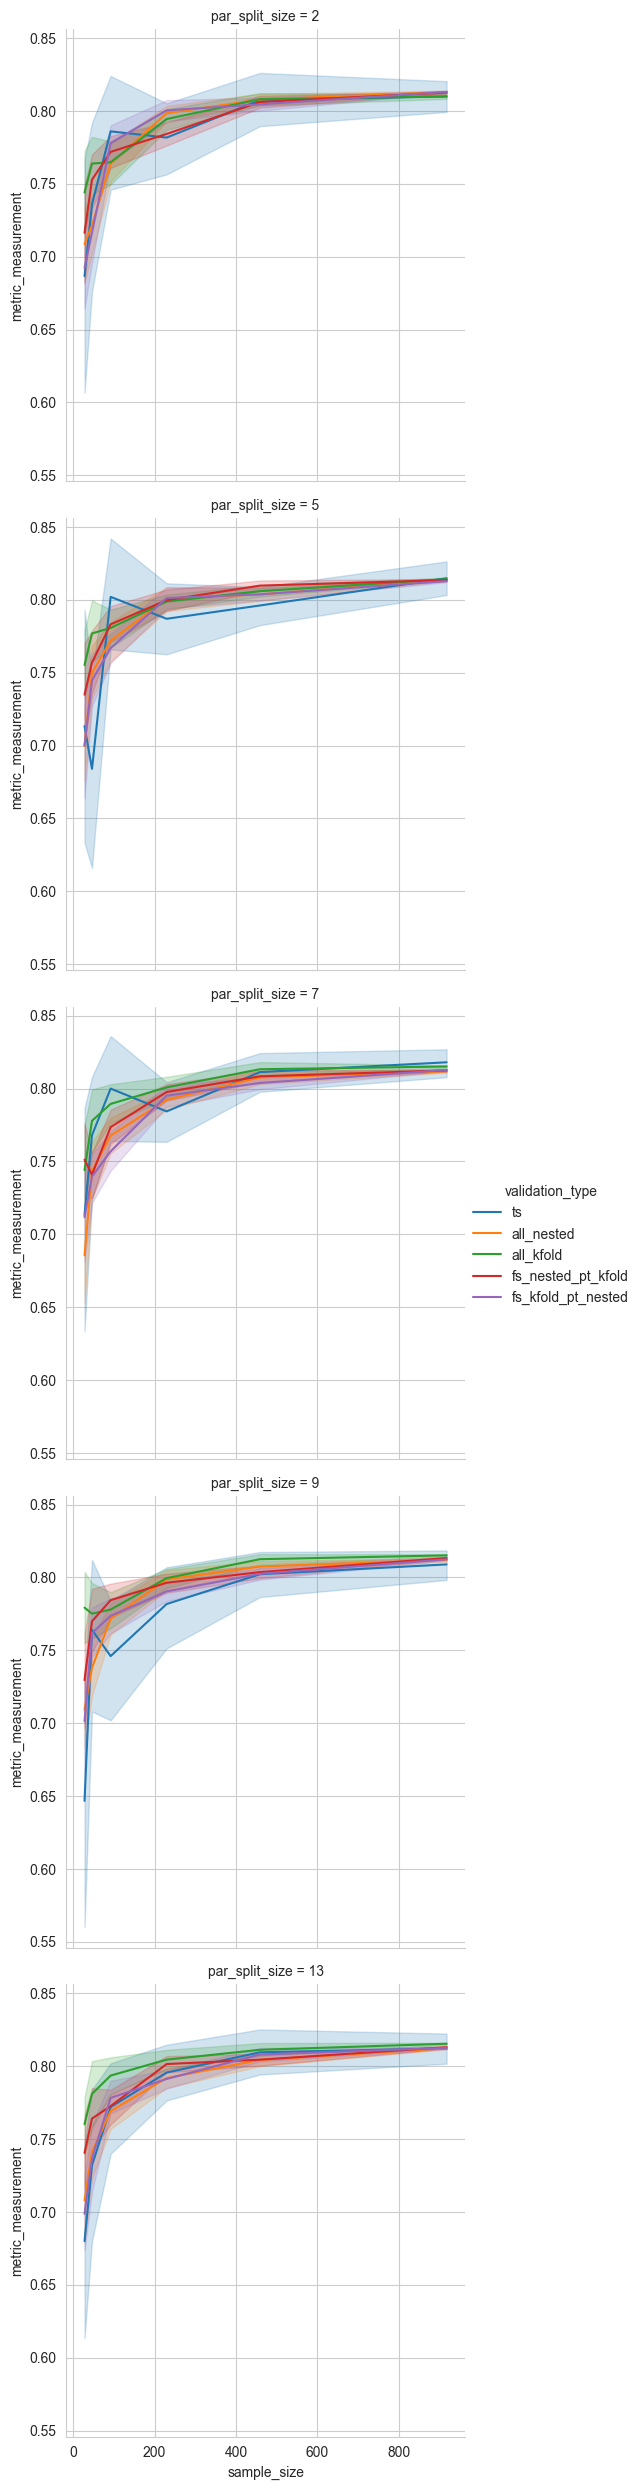

In [18]:
sns.relplot(x='sample_size', data=accuracy_selection_lr, hue='validation_type', kind='line', y='metric_measurement', ci=95, row='par_split_size')
plt.show()

In [19]:
selection_lr = pivoted[pivoted['model'] == 'logistic_regression']
selection_lr

,metric_type,sample_size,par_split_size,train_size,cv_split_size,feature_selection_frac,feature_selector,validation_type,model,main_metric,metric_measurement
0,accuracy,27.54,2,0.9,NaN,1.0,rfe,ts,logistic_regression,accuracy,1.000000
1,accuracy,27.54,2,0.9,NaN,1.0,rfe,ts,logistic_regression,accuracy,0.333333
2,accuracy,27.54,2,0.9,NaN,1.0,rfe,ts,logistic_regression,accuracy,0.000000
3,accuracy,27.54,2,0.9,NaN,1.0,rfe,ts,logistic_regression,accuracy,0.666667
4,accuracy,27.54,2,0.9,NaN,1.0,rfe,ts,logistic_regression,accuracy,0.666667
...,...,...,...,...,...,...,...,...,...,...,...
37495,recall,918.00,13,NaN,13.0,1.0,rfe,fs_kfold_pt_nested,logistic_regression,accuracy,0.809828
37496,recall,918.00,13,NaN,13.0,1.0,rfe,fs_kfold_pt_nested,logistic_regression,accuracy,0.813140
37497,recall,918.00,13,NaN,13.0,1.0,rfe,fs_kfold_pt_nested,logistic_regression,accuracy,0.813063
37498,recall,918.00,13,NaN,13.0,1.0,rfe,fs_kfold_pt_nested,logistic_regression,accuracy,0.810989


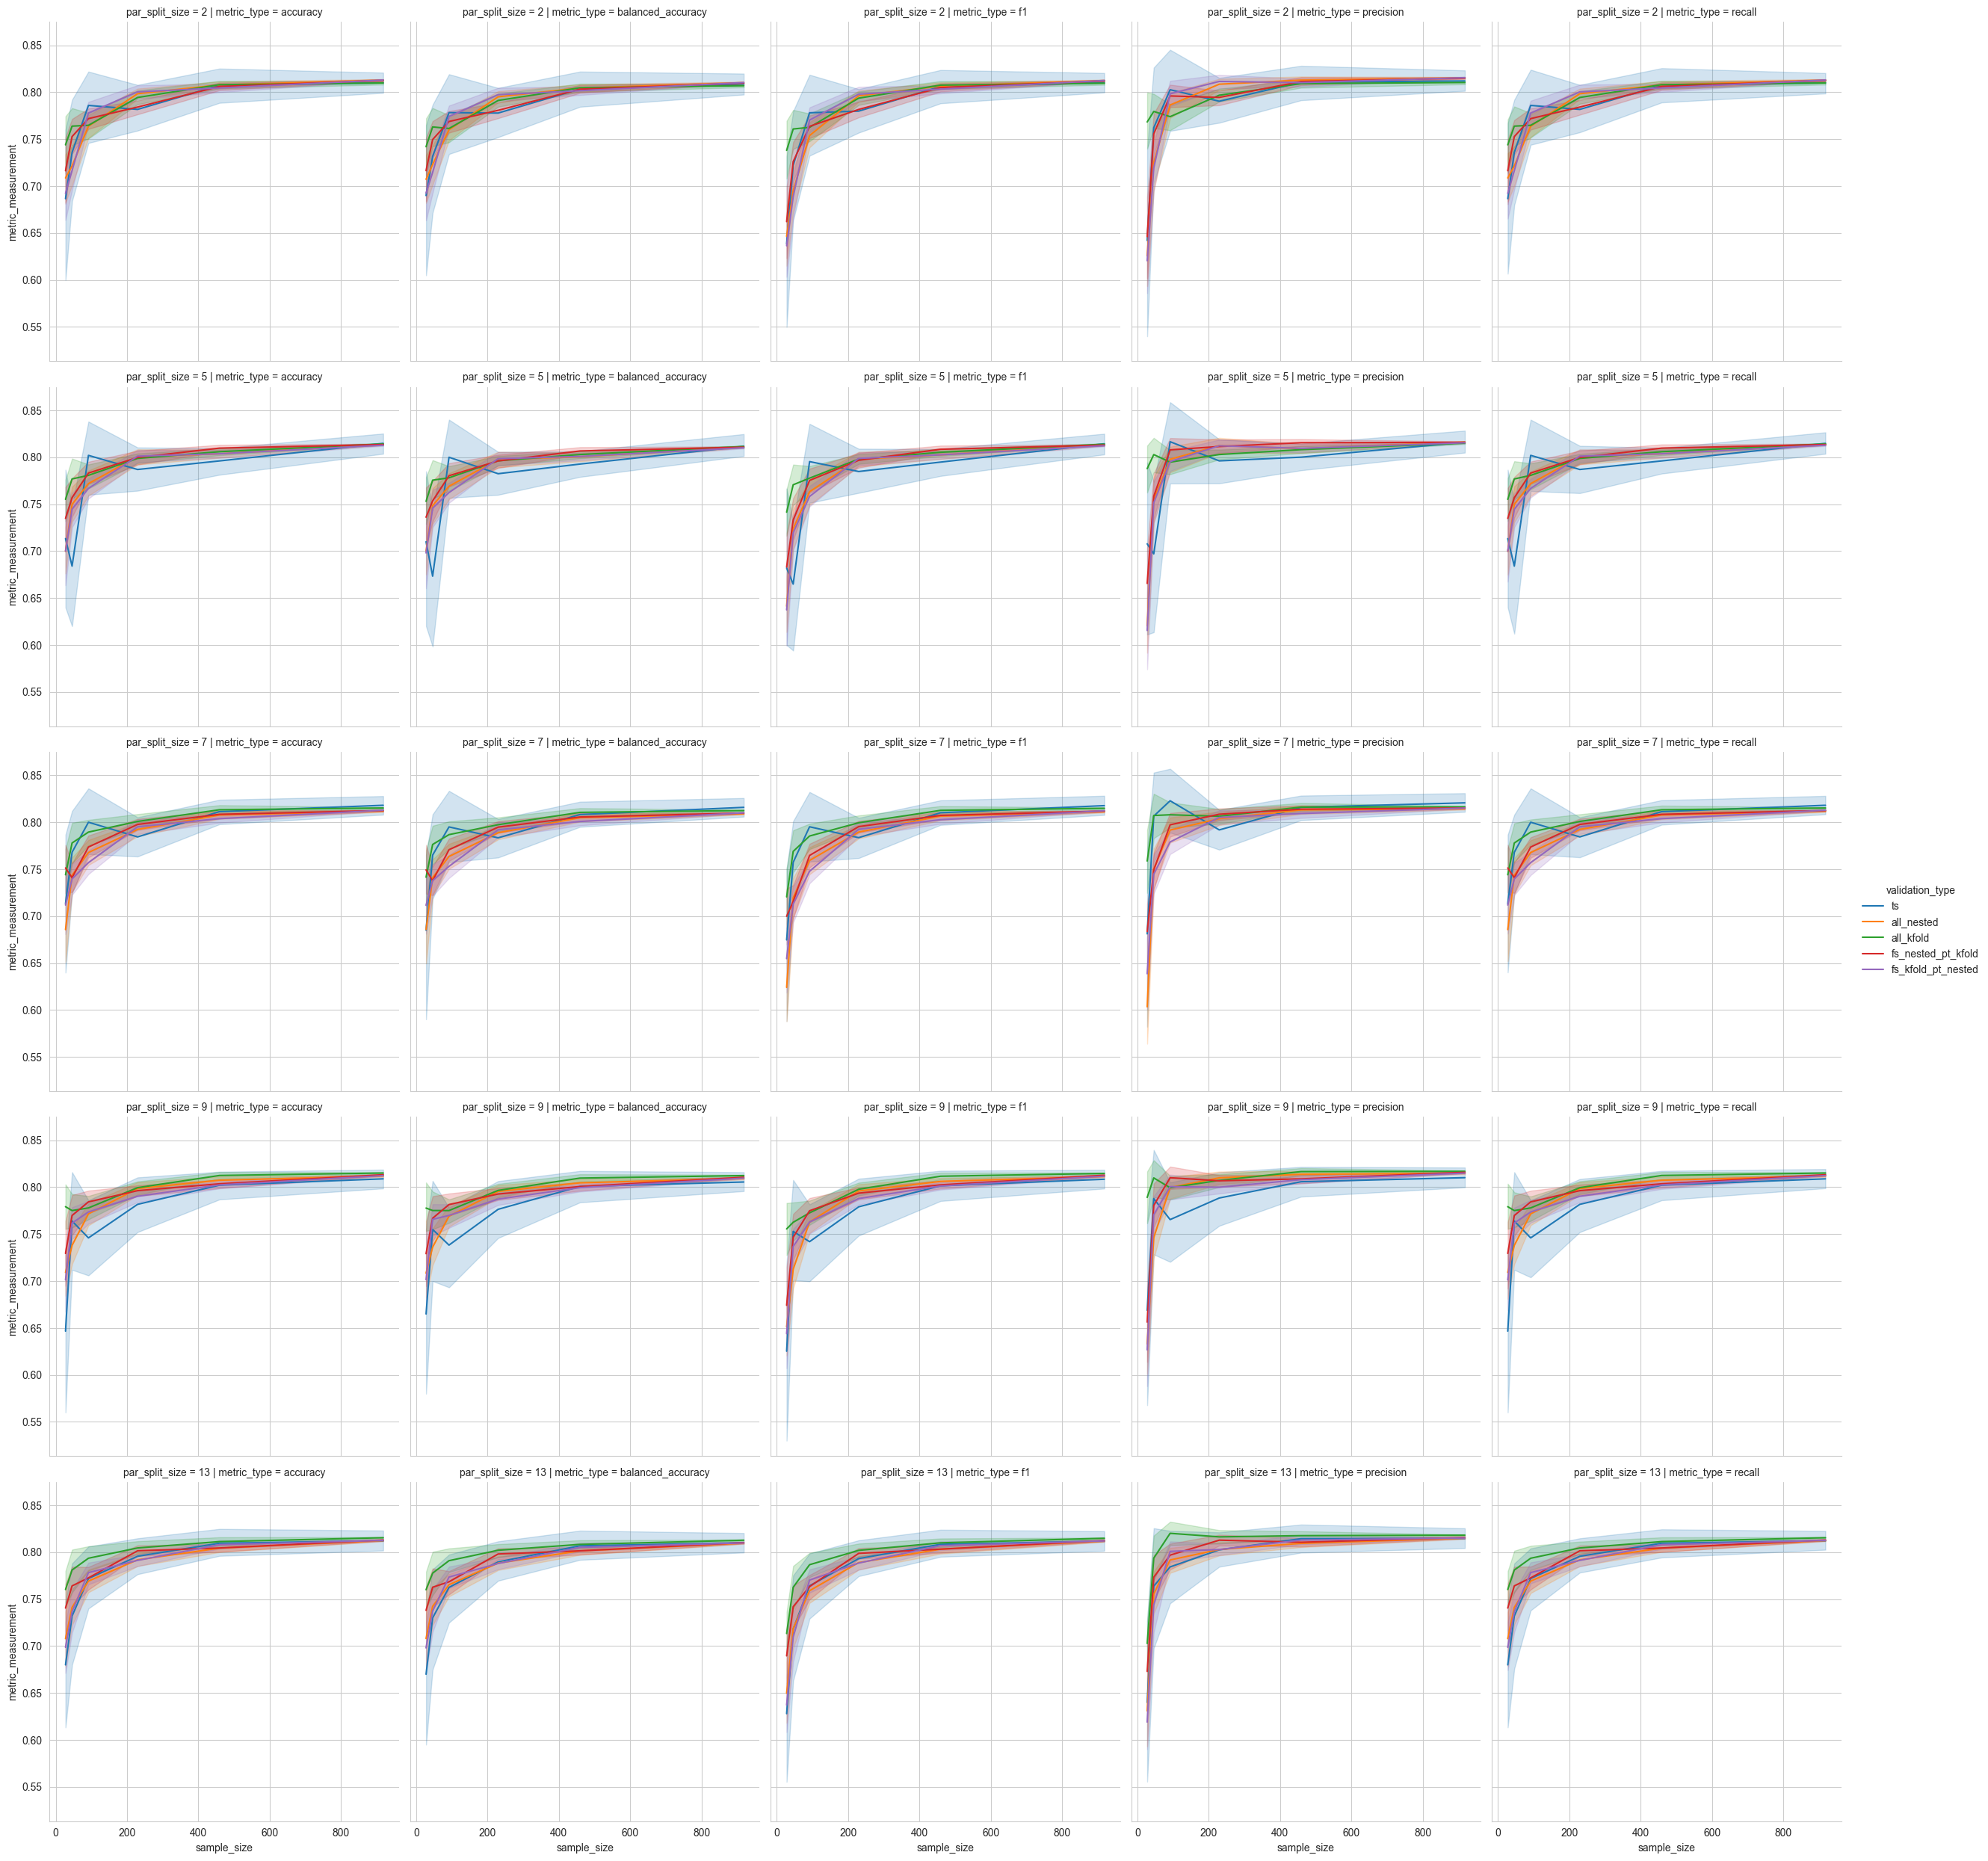

In [20]:
sns.relplot(x='sample_size', data=selection_lr, hue='validation_type', kind='line', y='metric_measurement',  ci=95, row='par_split_size', col='metric_type')
plt.show()